In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('dblp-v10.csv')

In [3]:
df.head()

,abstract,authors,n_citation,references,title,venue,year,id
0,"In this paper, a robust 3D triangular mesh wat...","['S. Ben Jabra', 'Ezzeddine Zagrouba']",50,"['09cb2d7d-47d1-4a85-bfe5-faa8221e644b', '10aa...",A new approach of 3D watermarking based on ima...,international symposium on computers and commu...,2008,4ab3735c-80f1-472d-b953-fa0557fed28b
1,We studied an autoassociative neural network w...,"['Joaquín J. Torres', 'Jesús M. Cortés', 'Joaq...",50,"['4017c9d2-9845-4ad2-ad5b-ba65523727c5', 'b118...",Attractor neural networks with activity-depend...,Neurocomputing,2007,4ab39729-af77-46f7-a662-16984fb9c1db
2,It is well-known that Sturmian sequences are t...,"['Genevi eve Paquin', 'Laurent Vuillon']",50,"['1c655ee2-067d-4bc4-b8cc-bc779e9a7f10', '2e4e...",A characterization of balanced episturmian seq...,Electronic Journal of Combinatorics,2007,4ab3a4cf-1d96-4ce5-ab6f-b3e19fc260de
3,One of the fundamental challenges of recognizi...,"['Yaser Sheikh', 'Mumtaz Sheikh', 'Mubarak Shah']",221,"['056116c1-9e7a-4f9b-a918-44eb199e67d6', '05ac...",Exploring the space of a human action,international conference on computer vision,2005,4ab3a98c-3620-47ec-b578-884ecf4a6206
4,This paper generalizes previous optimal upper ...,"['Efraim Laksman', 'Håkan Lennerstad', 'Magnus...",0,"['01a765b8-0cb3-495c-996f-29c36756b435', '5dbc...",Generalized upper bounds on the minimum distan...,Ima Journal of Mathematical Control and Inform...,2015,4ab3b585-82b4-4207-91dd-b6bce7e27c4e


In [4]:
df.columns

Index(['abstract', 'authors', 'n_citation', 'references', 'title', 'venue',
       'year', 'id'],
      dtype='object')

In [5]:
df.shape

(1000000, 8)

In [6]:
# Dataset shape and overview
print("Shape of the dataset:", df.shape)

# Column data types and missing values
print("\nColumn Data Types and Missing Values:")
print(df.info())

# Check for missing or null values
print("\nMissing Values Count:")
print(df.isnull().sum())

Shape of the dataset: (1000000, 8)

Column Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   abstract    827533 non-null   object
 1   authors     999998 non-null   object
 2   n_citation  1000000 non-null  int64 
 3   references  875583 non-null   object
 4   title       1000000 non-null  object
 5   venue       822245 non-null   object
 6   year        1000000 non-null  int64 
 7   id          1000000 non-null  object
dtypes: int64(2), object(6)
memory usage: 61.0+ MB
None

Missing Values Count:
abstract      172467
authors            2
n_citation         0
references    124417
title              0
venue         177755
year               0
id                 0
dtype: int64


In [7]:
df.dropna(subset='abstract',inplace=True)

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Download stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):  # Handle non-string data
        return ""
    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = text.split()  # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Remove stopwords & lemmatize
    return " ".join(tokens)

# Apply preprocessing
df['cleaned_abstract'] = df['abstract'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ishas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ishas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
df[['abstract','cleaned_abstract']]

,abstract,cleaned_abstract
0,"In this paper, a robust 3D triangular mesh wat...",paper robust triangular mesh watermarking algo...
1,We studied an autoassociative neural network w...,studied autoassociative neural network dynamic...
2,It is well-known that Sturmian sequences are t...,wellknown sturmian sequence non ultimately per...
3,One of the fundamental challenges of recognizi...,one fundamental challenge recognizing action a...
4,This paper generalizes previous optimal upper ...,paper generalizes previous optimal upper bound...
...,...,...
999994,Abstract The article presents a narrative revi...,abstract article present narrative review scho...
999995,"In MANETs, exchange of data is carried out wit...",manet exchange data carried help neighbouring ...
999996,This paper presents a micro-power photovoltaic...,paper present micropower photovoltaic pv harve...
999997,"In this work, a distillation system is designe...",work distillation system designed purify dimet...


In [10]:
df.head()

,abstract,authors,n_citation,references,title,venue,year,id,cleaned_abstract
0,"In this paper, a robust 3D triangular mesh wat...","['S. Ben Jabra', 'Ezzeddine Zagrouba']",50,"['09cb2d7d-47d1-4a85-bfe5-faa8221e644b', '10aa...",A new approach of 3D watermarking based on ima...,international symposium on computers and commu...,2008,4ab3735c-80f1-472d-b953-fa0557fed28b,paper robust triangular mesh watermarking algo...
1,We studied an autoassociative neural network w...,"['Joaquín J. Torres', 'Jesús M. Cortés', 'Joaq...",50,"['4017c9d2-9845-4ad2-ad5b-ba65523727c5', 'b118...",Attractor neural networks with activity-depend...,Neurocomputing,2007,4ab39729-af77-46f7-a662-16984fb9c1db,studied autoassociative neural network dynamic...
2,It is well-known that Sturmian sequences are t...,"['Genevi eve Paquin', 'Laurent Vuillon']",50,"['1c655ee2-067d-4bc4-b8cc-bc779e9a7f10', '2e4e...",A characterization of balanced episturmian seq...,Electronic Journal of Combinatorics,2007,4ab3a4cf-1d96-4ce5-ab6f-b3e19fc260de,wellknown sturmian sequence non ultimately per...
3,One of the fundamental challenges of recognizi...,"['Yaser Sheikh', 'Mumtaz Sheikh', 'Mubarak Shah']",221,"['056116c1-9e7a-4f9b-a918-44eb199e67d6', '05ac...",Exploring the space of a human action,international conference on computer vision,2005,4ab3a98c-3620-47ec-b578-884ecf4a6206,one fundamental challenge recognizing action a...
4,This paper generalizes previous optimal upper ...,"['Efraim Laksman', 'Håkan Lennerstad', 'Magnus...",0,"['01a765b8-0cb3-495c-996f-29c36756b435', '5dbc...",Generalized upper bounds on the minimum distan...,Ima Journal of Mathematical Control and Inform...,2015,4ab3b585-82b4-4207-91dd-b6bce7e27c4e,paper generalizes previous optimal upper bound...


In [13]:
df.columns

Index(['abstract', 'authors', 'n_citation', 'references', 'title', 'venue',
       'year', 'id', 'cleaned_abstract'],
      dtype='object')

In [ ]:
df.drop(['n_citation', 'references','venue','id'],inplace=True,axis=1)

In [ ]:
df.to_csv('finalData.csv')

In [ ]:
with open('df.pkl', 'wb') as file:
    pickle.dump(df, file)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer(max_df=0.9, min_df=5, stop_words='english')

# Fit and transform the processed abstracts
tfidf_matrix = vectorizer.fit_transform(df['cleaned_abstract'])

# Check the shape of the TF-IDF matrix
tfidf_matrix.shape

(827533, 108411)

In [12]:
from sklearn.decomposition import TruncatedSVD

# Initialize LSA model (TruncatedSVD)
n_topics = 5  # Number of topics to extract, can be adjusted
lsa_model = TruncatedSVD(n_components=n_topics, random_state=42)

# Fit LSA model and transform the TF-IDF matrix
lsa_topic_matrix = lsa_model.fit_transform(tfidf_matrix)

# Check the shape of the LSA matrix
lsa_topic_matrix.shape

(827533, 5)

In [12]:
import pickle

In [22]:
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)
with open("lsa_model.pkl", "wb") as f:
    pickle.dump(lsa_model, f)

In [23]:
np.save("lsa_topic_matrix.npy", lsa_topic_matrix)

In [ ]:
# Get the terms corresponding to the columns of the TF-IDF matrix
terms = vectorizer.get_feature_names_out()

# Display the top words for each topic
def print_top_words(model, terms, n_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([terms[i] for i in topic.argsort()[:-n_words - 1:-1]]))
        print("\n")

# Display top words for each topic
print_top_words(lsa_model, terms)


Topic #1:
algorithm model network data method problem proposed approach paper result


Topic #2:
network service node protocol wireless user communication mobile sensor routing


Topic #3:
algorithm channel network scheme proposed node problem power signal error


Topic #4:
image network node feature sensor data video object wireless user


Topic #5:
algorithm network problem graph node data learning set query routing




In [20]:
from wordcloud import WordCloud

In [38]:
def plot_word_cloud_for_topic(topic_idx, model, terms, n_top_words=40):
    top_features_idx = model.components_[topic_idx].argsort()[:-n_top_words - 1:-1]
    top_words = [terms[i] for i in top_features_idx]
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(top_words))
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {topic_idx + 1} Word Cloud", fontsize=14, fontweight='bold')

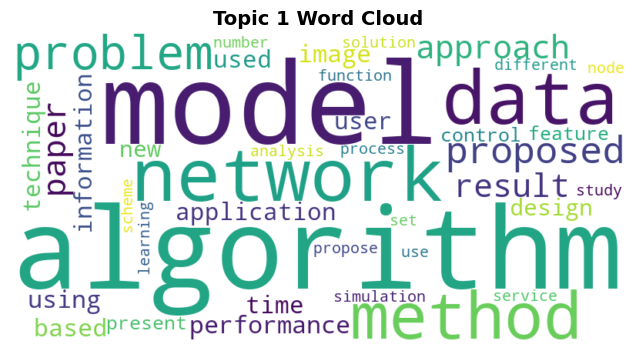

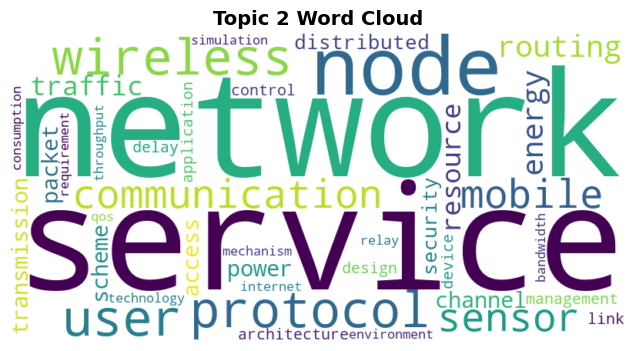

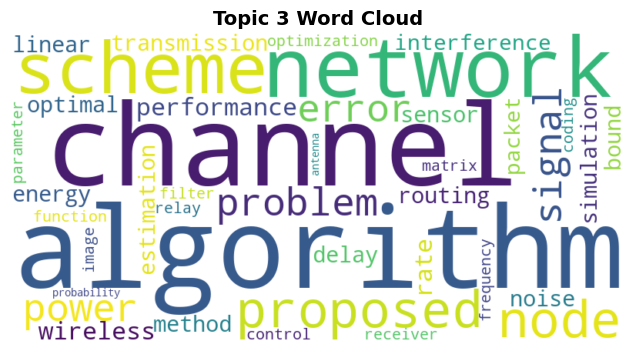

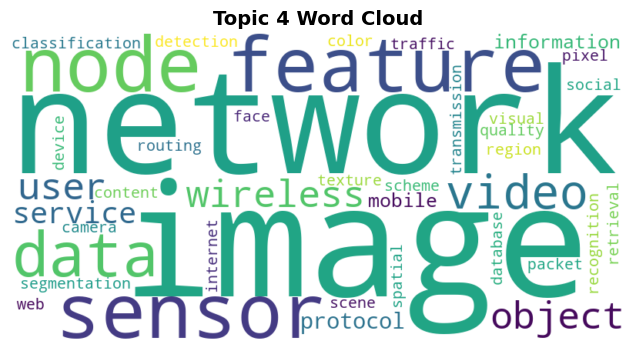

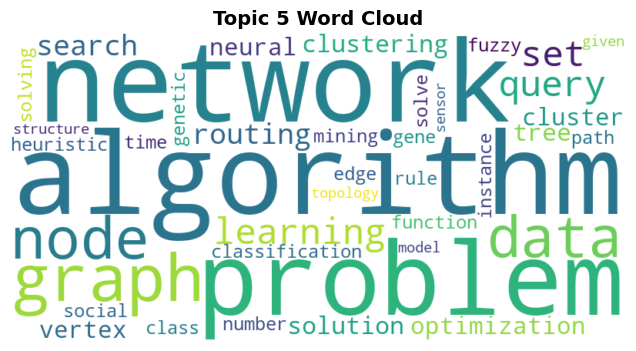

In [39]:
for topic_idx in range(5):
    plot_word_cloud_for_topic(topic_idx, lsa_model, vectorizer.get_feature_names_out())

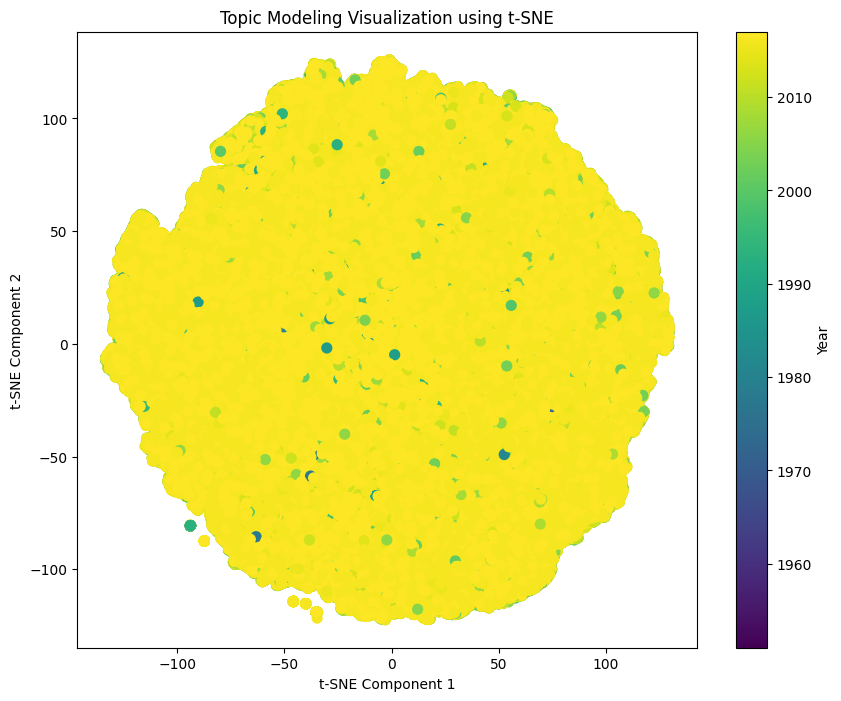

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Apply t-SNE to reduce LSA topic matrix to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(lsa_topic_matrix)

# Plot the topics
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['year'], cmap='viridis', s=50)
plt.title('Topic Modeling Visualization using t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Year')
plt.show()


In [13]:
import numpy as np

# Get topic keywords
def get_topic_keywords(lsa_model, feature_names, n_top_words=5):
    topics = []
    for topic_idx, topic in enumerate(lsa_model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(top_words)
    return topics

# Extract feature names and topics
feature_names = vectorizer.get_feature_names_out()
topics = get_topic_keywords(lsa_model, feature_names)

In [14]:
# Assign the most dominant topic to each document
df['topic'] = lsa_topic_matrix.argmax(axis=1)

# Preview the documents with their assigned topics
df[['title', 'abstract', 'topic']].head()

,title,abstract,topic
0,A new approach of 3D watermarking based on ima...,"In this paper, a robust 3D triangular mesh wat...",0
1,Attractor neural networks with activity-depend...,We studied an autoassociative neural network w...,0
2,A characterization of balanced episturmian seq...,It is well-known that Sturmian sequences are t...,0
3,Exploring the space of a human action,One of the fundamental challenges of recognizi...,0
4,Generalized upper bounds on the minimum distan...,This paper generalizes previous optimal upper ...,0


In [ ]:
df.to_csv('LSAresults.csv')

In [15]:
df['topic'].value_counts()

topic
0    778432
1     18784
3     13774
4      8761
2      7782
Name: count, dtype: int64

In [16]:
# Create summary table
summary = []
for topic_idx, top_words in enumerate(topics):
    topic_docs = df[df['topic'] == topic_idx]
    count = len(topic_docs)
    representative_docs = topic_docs['cleaned_abstract'].sample(n=min(3, count), random_state=42).tolist() if count > 0 else []
    summary.append({
        "Topic": topic_idx,
        "Count": count,
        "Name": f"{topic_idx}_{'_'.join(top_words[:5])}",
        "Representation": top_words,
        "Representative_Docs": representative_docs
    })

import pandas as pd
summary_df = pd.DataFrame(summary)

In [17]:
summary_df

,Topic,Count,Name,Representation,Representative_Docs
0,0,778432,0_algorithm_model_network_data_method,"[algorithm, model, network, data, method]",[study connection orthogonal polynomial reprod...
1,1,18784,1_network_service_node_protocol_wireless,"[network, service, node, protocol, wireless]",[mobile communication network need public key ...
2,2,7782,2_algorithm_channel_network_scheme_proposed,"[algorithm, channel, network, scheme, proposed]",[paper investigate signaltonoise ratiobased in...
3,3,13774,3_image_network_node_feature_sensor,"[image, network, node, feature, sensor]",[algorithm represents hdr image using dual exp...
4,4,8761,4_algorithm_network_problem_graph_node,"[algorithm, network, problem, graph, node]",[let h undirected graph list hhomomorphism pro...


In [18]:
summary_df.to_csv('SummaryLSA.csv')

In [ ]:
for topic in range(5):  # Adjust if you increase the number of topics
    print(f"Sample documents for Topic {topic}:")
    print(df[df['topic'] == topic]['abstract'].head())


Sample documents for Topic 0:
0    In this paper, a robust 3D triangular mesh wat...
1    We studied an autoassociative neural network w...
2    It is well-known that Sturmian sequences are t...
3    One of the fundamental challenges of recognizi...
4    This paper generalizes previous optimal upper ...
Name: abstract, dtype: object
Sample documents for Topic 1:
23    Virtual position-based routing protocols have ...
27    I consider the known localized multicast proto...
30    The performance of a multihop wireless network...
38    The popularity of service oriented computing (...
51    Given is a wireless multihop network whose nod...
Name: abstract, dtype: object
Sample documents for Topic 2:
50     A semiblind method is proposed for simultaneou...
88     In this paper, we derive throughput of a thres...
111    Channels with a long but sparse impulse respon...
115    In the tone reservation (TR) scheme of the ort...
213    In this paper, we propose beamforming schemes ...
Name: abst

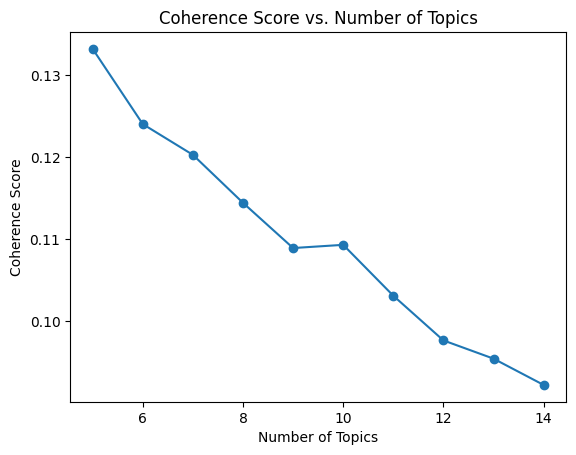

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Function to calculate coherence score
def calculate_coherence(lsa_model, tfidf_feature_names, top_n=10):
    coherence_scores = []
    components = lsa_model.components_  # Get the topic-term matrix
    for topic in components:
        # Get indices of top words in this topic
        top_indices = topic.argsort()[-top_n:]
        top_words = [tfidf_feature_names[i] for i in top_indices]
        # Calculate pairwise similarity between top words
        similarity = cosine_similarity(tfidf_matrix.T[top_indices, :])
        avg_similarity = np.mean(similarity[np.triu_indices_from(similarity, k=1)])
        coherence_scores.append(avg_similarity)
    return np.mean(coherence_scores)  # Return average coherence score for this topic

# Precompute coherence for each model
tfidf_feature_names = vectorizer.get_feature_names_out()  # Adjust based on your vectorizer
coherence_scores = []

for num_topics in range(5, 15):
    lsa_model = TruncatedSVD(n_components=num_topics, random_state=42)
    lsa_model.fit(tfidf_matrix)
    coherence = calculate_coherence(lsa_model, tfidf_feature_names)
    coherence_scores.append(coherence)

# Plot coherence scores
import matplotlib.pyplot as plt

plt.plot(range(5, 15), coherence_scores, marker='o')
plt.title('Coherence Score vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

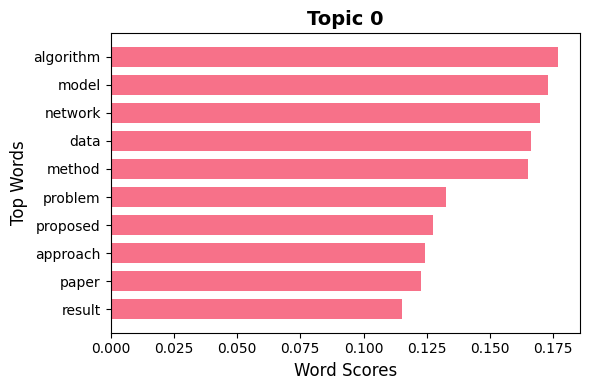

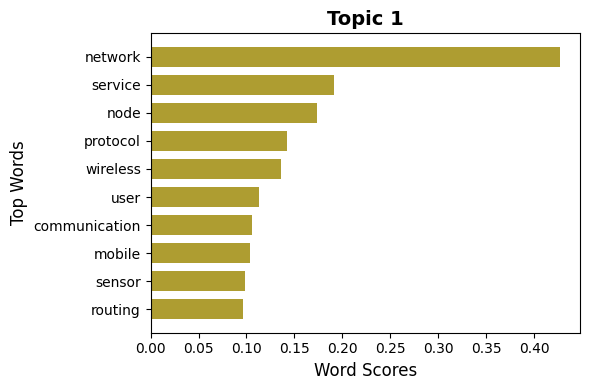

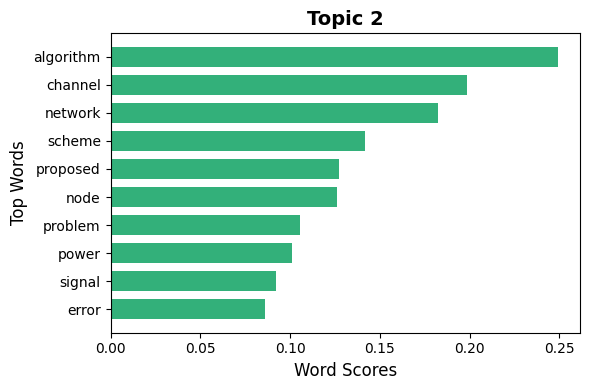

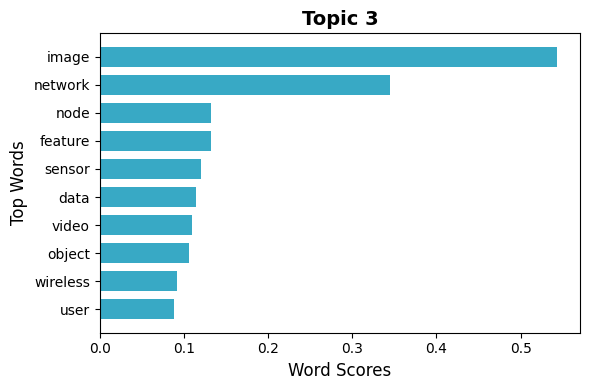

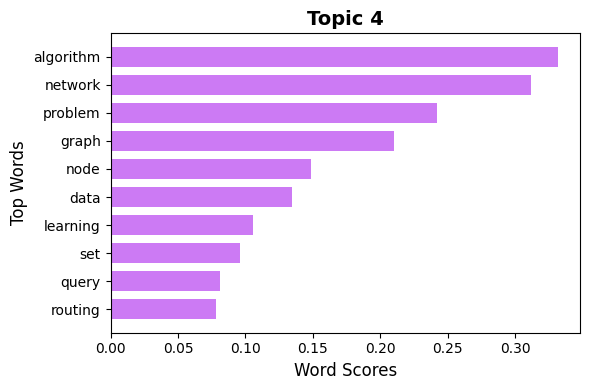

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # For color palette

# Function to visualize topics
def plot_individual_topic_word_scores(model, feature_names, n_top_words=10, save=False):
    n_topics = model.components_.shape[0]
    colors = sns.color_palette("husl", n_topics)  # Generate distinct colors for each topic

    for topic_idx, topic in enumerate(model.components_):
        top_features_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_idx]
        weights = topic[top_features_idx]

        # Create a bar plot for each topic
        plt.figure(figsize=(6, 4))
        plt.barh(top_features, weights, color=colors[topic_idx], height=0.7)
        plt.title(f"Topic {topic_idx}", fontsize=14, fontweight='bold')
        plt.xlabel("Word Scores", fontsize=12)
        plt.ylabel("Top Words", fontsize=12)
        plt.gca().invert_yaxis()  # Invert y-axis for better readability
        plt.tight_layout()

        # Optionally save plots
        if save:
            plt.savefig(f"topic_{topic_idx}.png", dpi=300)

        plt.show()  # Show each topic plot

# Apply to your LSA model
plot_individual_topic_word_scores(lsa_model, vectorizer.get_feature_names_out(), n_top_words=10)


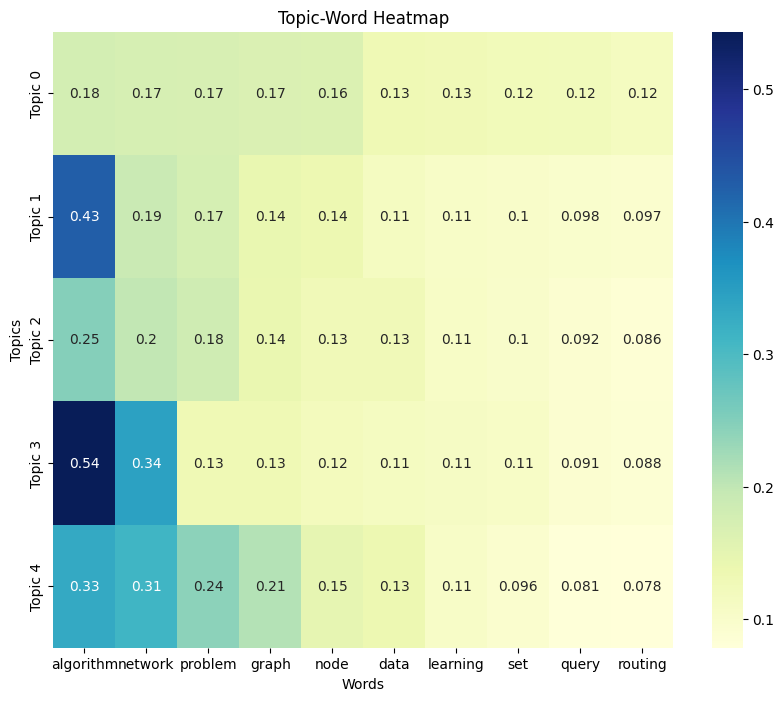

In [ ]:
import seaborn as sns

def plot_topic_word_heatmap(model, feature_names, n_top_words=10):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_features_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_idx]
        weights = topic[top_features_idx]
        topics.append(weights)
    topics = np.array(topics)

    # Create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(topics, annot=True, cmap="YlGnBu", xticklabels=top_features, yticklabels=[f"Topic {i}" for i in range(topics.shape[0])])
    plt.title("Topic-Word Heatmap")
    plt.xlabel("Words")
    plt.ylabel("Topics")
    plt.show()

plot_topic_word_heatmap(lsa_model, vectorizer.get_feature_names_out(), n_top_words=10)


In [ ]:
tsne_results

array([[-92.406845 ,  42.627052 ],
       [ 90.35828  ,   4.744469 ],
       [ -2.3736377,  -2.1794481],
       ...,
       [ 56.848595 ,  71.066    ],
       [  9.3448105, -22.997704 ],
       [ -1.1167347,  -8.754865 ]], dtype=float32)

In [ ]:
n_topics = lsa_topic_matrix.shape[1]
df_topics_time = pd.DataFrame(lsa_topic_matrix, columns=[f"Topic {i}" for i in range(n_topics)])
df_topics_time['year'] = df['year'].values

# Group by year and calculate mean topic weights
topics_over_time = df_topics_time.groupby('year').mean()

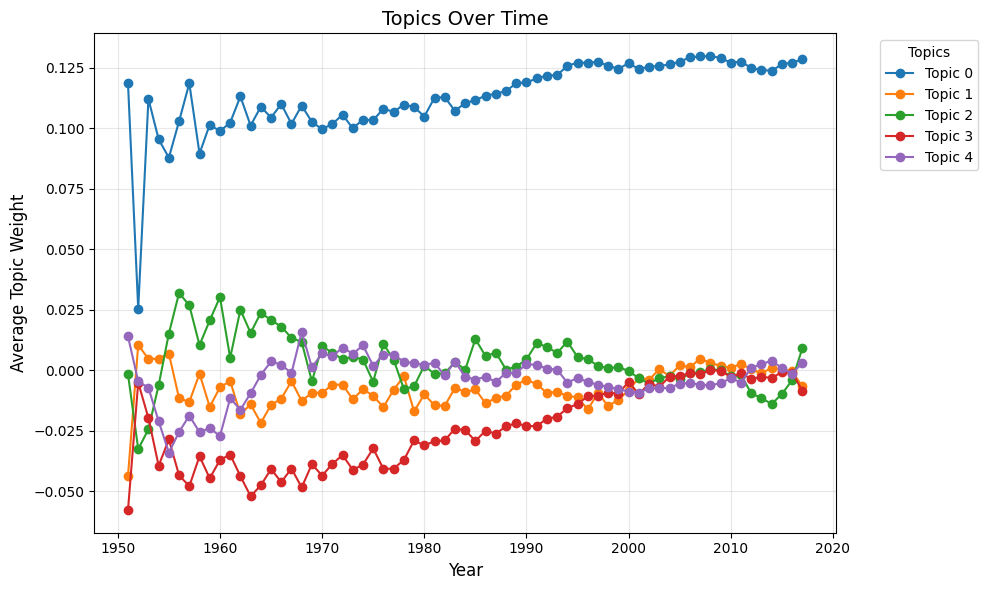

In [ ]:
# Plot topics over time
plt.figure(figsize=(10, 6))
for topic in topics_over_time.columns:
    plt.plot(topics_over_time.index, topics_over_time[topic], marker='o', label=topic)

plt.title("Topics Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Topic Weight", fontsize=12)
plt.legend(title="Topics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [14]:
from scipy.sparse import csr_matrix
lsa_topic_matrix_sparse = csr_matrix(lsa_topic_matrix)

In [15]:
from scipy.sparse import csr_matrix
import faiss
import numpy as np

# Convert your sparse matrix to dense (if it's not already)
lsa_topic_matrix_dense = lsa_topic_matrix_sparse.toarray()

In [15]:
import faiss

In [16]:
def build_faiss_index(matrix):
    """
    Build a FAISS index for fast approximate nearest neighbor search.

    Args:
        matrix (numpy.array): The input LSA topic matrix.

    Returns:
        faiss.Index: The built FAISS index.
    """
    n_samples, n_features = matrix.shape

    # Convert to float32 as FAISS requires 32-bit floats
    matrix = np.array(matrix, dtype=np.float32)
    
    # Build the FAISS index (using L2 distance, equivalent to cosine similarity)
    index = faiss.IndexFlatL2(n_features)
    index.add(matrix)  # Add vectors to the index
    
    return index

In [24]:
faiss_index = build_faiss_index(lsa_topic_matrix)
faiss.write_index(faiss_index, "faiss_index.index")

In [18]:
def vectorize_user_input(user_input, vectorizer, lsa_model):
    """
    Vectorize the user's input text using TF-IDF and LSA.

    Args:
        user_input (str): User's input text.
        vectorizer (TfidfVectorizer): Trained TF-IDF vectorizer.
        lsa_model (TruncatedSVD): Trained LSA model.

    Returns:
        numpy.ndarray: Embedding of the user input.
    """
    tfidf_vector = vectorizer.transform([user_input])
    lsa_embedding = lsa_model.transform(tfidf_vector)
    # Ensure the embedding is in float32 format for FAISS
    lsa_embedding = lsa_embedding.astype('float32')
    faiss.normalize_L2(lsa_embedding)  # Normalize for cosine similarity
    return lsa_embedding

In [19]:
# Step 6: Get Paper Details Function
def get_paper_details(index, df):
    """
    Retrieve metadata for a paper given its index.

    Args:
        index (int): Index of the paper in the DataFrame.
        df (DataFrame): DataFrame containing paper metadata.

    Returns:
        dict: Metadata of the paper.
    """
    paper = df.iloc[index]
    return {
        "title": paper.get('title', 'N/A'),
        "abstract": paper.get('abstract', 'N/A'),
        "authors": paper.get('authors', 'N/A'),
        "venue": paper.get('venue', 'N/A'),
        "year": paper.get('year', 'N/A'),
        "id": paper.get('id', 'N/A')
    }

In [20]:
def get_recommendations_with_embeddings(user_input, faiss_index, lsa_topic_matrix, papers_data, top_n=5):
    """
    Get recommendations based on user's input converted to embeddings.

    Args:
        user_input (str): User's keywords or topic description.
        faiss_index: FAISS index for the topic embeddings.
        lsa_topic_matrix (numpy.ndarray): LSA topic embeddings.
        papers_data (DataFrame): Dataframe containing paper metadata.
        top_n (int): Number of recommendations to return.

    Returns:
        list of dicts: Recommended papers with metadata.
    """
    # Convert user input to an embedding
    user_embedding = vectorize_user_input(user_input, vectorizer, lsa_model)

    # Query the FAISS index for the closest topics
    distances, indices = faiss_index.search(user_embedding, top_n)

    # Retrieve papers related to the closest topics
    recommendations = []
    for idx, score in zip(indices[0], distances[0]):
        paper = get_paper_details(idx, papers_data)
        recommendations.append({
            "title": paper['title'],
            "abstract": paper['abstract'],
            "authors": paper['authors'],
            "venue": paper['venue'],
            "year": paper['year'],
            "id": paper['id'],
            "similarity_score": 1 - score  # Convert distance to similarity
        })
    return recommendations

In [21]:
user_input = "image segmentation in neural networks"
    
# Get recommendations
recommendations = get_recommendations_with_embeddings(user_input, faiss_index, lsa_topic_matrix, df, top_n=5)
    
    # Display recommendations
print("Top Recommendations:")
for rec in recommendations:
    print(f"Title: {rec['title']}")
    print(f"Similarity Score: {rec['similarity_score']:.4f}")
    print(f"Abstract: {rec['abstract']}")
    print(f"Authors: {rec['authors']}")
    print(f"Venue: {rec['venue']} | Year: {rec['year']}")
    print('-' * 80)

Top Recommendations:
Title: Subband image segmentation using VQ for content-based image retrieval
Similarity Score: 0.8453
Abstract: Retrieving images from a large image dataset using image content as a key is an important issue. In this paper, we present a new content-based image retrieval approach using a Wavelet transform and subband image segmentation. For the image retrieval, we first decompose the image using a Wavelet transform and adopt vector a quantization(VQ) algorithm to perform automatic segmentation based on image features such as color and texture. The wavelet transform decomposes the image into 4 subbands(LL,LH,HL,HH). Only the LL component is further decomposed until the desired depth is reached. The image segmentation is performed using the HIS color and texture features of the low pass sub-band component image. The VQ provides a transformation from the raw pixel data to a small group of homogeneous classes which are coherent in color and texture space. For managing a

Tried running cosine similarity, but getting memory error, tried different methods like batch processing, memory allocation, but nothing seems to work.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def batch_cosine_similarity(matrix, batch_size, dense_output=False):
    """
    Computes cosine similarity in batches to avoid memory overflow.

    Args:
        matrix (sparse matrix): The input LSA topic matrix in sparse format.
        batch_size (int): Number of rows to process in one batch.
        dense_output (bool): Whether to return dense output or sparse.

    Returns:
        sparse matrix: Cosine similarity matrix.
    """
    n_samples = matrix.shape[0]
    similarity_matrix = []

    # Process the matrix in batches
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        batch = matrix[start:end, :]

        # Compute cosine similarity for the current batch
        batch_similarity = cosine_similarity(batch, matrix, dense_output=dense_output)
        similarity_matrix.append(batch_similarity)

    # Stack the similarity matrices from each batch
    cosine_similarities = np.vstack(similarity_matrix)

    # Convert back to sparse matrix if needed
    if not dense_output:
        cosine_similarities = csr_matrix(cosine_similarities)

    return cosine_similarities

In [ ]:
# Call batch_cosine_similarity to calculate similarities in batches
cosine_similarities = batch_cosine_similarity(lsa_topic_matrix_sparse, batch_size=100, dense_output=False)

# Print the cosine similarity matrix (dense form for display)
print("Cosine Similarity Matrix (dense format):")
print(cosine_similarities)

# Example: Get the top 3 most similar papers to the first document (index 0)
def recommend_papers(index, cosine_similarities, top_n=3):
    sim_scores = list(enumerate(cosine_similarities[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_similar_papers = sim_scores[1:top_n + 1]
    return top_similar_papers

# Get recommendations for the first document
index = 0
recommended_papers = recommend_papers(index, cosine_similarities, top_n=3)

# Display the recommended papers
for idx, score in recommended_papers:
    print(f"Recommended Paper Index: {idx}, Similarity Score: {score:.4f}")